<a href="https://colab.research.google.com/github/aruna09/Review-Topic-Polarity-Classification/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Dataset from the Drive ⚙

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the required packages and libraries 🙋‍♀️

In [ ]:
pip install nlpaug

In [ ]:
pip install nltk

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import matplotlib.ticker as ticker
import numpy as np
sns.set()

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

### Loading the Train and Test set

In [4]:
path = "/content/drive/My Drive/Ugam-HiringChallenge/Data"
os.chdir(path)

In [ ]:
train = pd.read_csv('train.csv',error_bad_lines=False)
test = pd.read_csv('test.csv',error_bad_lines=False)
submission = pd.read_csv('submission.csv',error_bad_lines=False)

data = train

In [10]:
data.head(15)

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1
5,5,I will never not use these. I highly recommend...,0,0,0,0,0,0,0,0,0,1,0,1
6,6,Very sturdy. You could hang a good sized fixtu...,0,0,0,0,0,0,1,0,0,1,0,1
7,7,Cuts pex clean and easily with one hand. Blade...,0,0,0,0,0,1,0,0,0,0,1,1
8,8,Good product in good condition ( no rust).,0,0,0,0,0,0,0,0,0,1,0,1
9,9,Yellow sprinkler made from pretty thin plastic...,0,0,0,0,0,0,1,0,0,1,0,1


### Visualization 📊✨

In [6]:
def plot_column_class_distribution(columns):
  i = 0
  fig, ax = plt.subplots(1, 2, figsize=(13,4))

  for column in columns:
    x = data[column].value_counts()
    sns.barplot(x = x.index, y = x, ax = ax[i], ci=None)
    i += 1

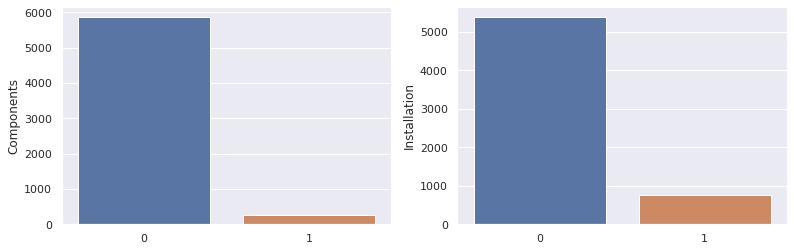

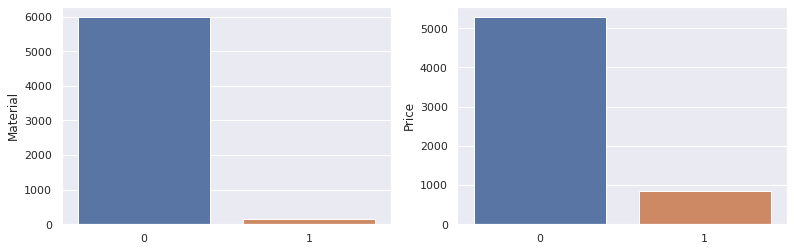

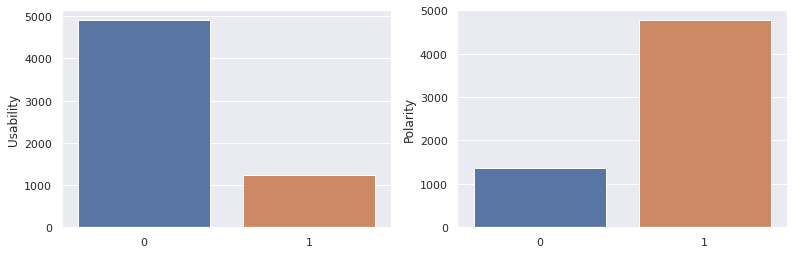

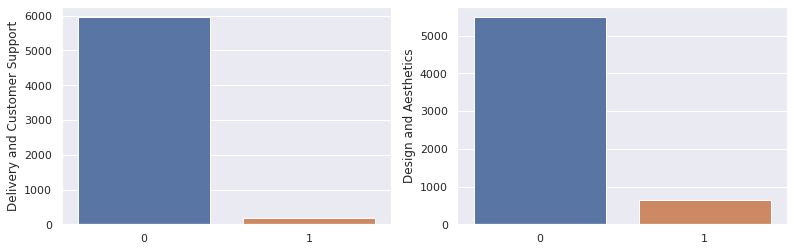

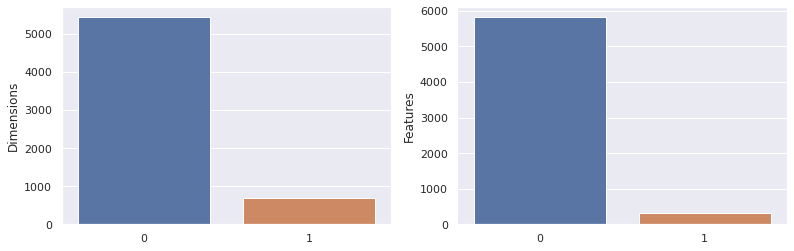

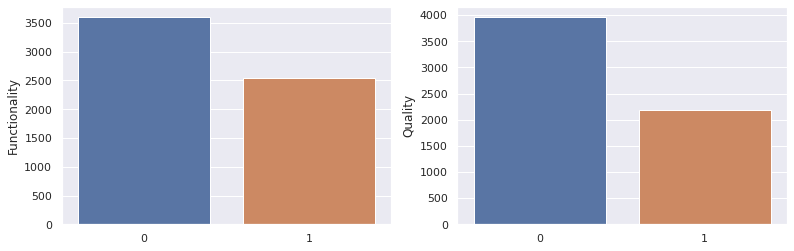

In [7]:
plot_column_class_distribution(['Components', 'Installation'])
plot_column_class_distribution(['Material', 'Price'])
plot_column_class_distribution(['Usability', 'Polarity'])
plot_column_class_distribution(['Delivery and Customer Support', 'Design and Aesthetics'])
plot_column_class_distribution(['Dimensions', 'Features'])
plot_column_class_distribution(['Functionality', 'Quality'])

### Dealing with Class Imbalance👩‍🏫👀
Reference: https://github.com/makcedward/nlpaug

1. From the visualizations its clear that most of the classes have an imbalanced spread of data.

2. In order to handel this, I came across a completely open source package: nlpaug(link above).

3. Approach:

Given a sentence, the number of words to replace and the number of new sentences to generate, this NLP Text Augmentation package helps us by generating synthetic data keeping in mind the considerations stated above.

4. An observation that I made, was that some of the text reviews were considerably long, which implies that more synthetic data can be generated from these.

5. With that in mind, I made the following assumptions while creating this synthetic data:

-> the default number of non-stop words to replace = 3

-> the default number of new sentences generated = 3

-> if the number of words in a review > 25, the sentence is considered long, and the number of non-stop words that can be replaced = 7

-> similarly, the total number of new sentences that can be generated is also increased to 7


In [8]:
import nlpaug
import nlpaug.augmenter.word as naw
from random import shuffle

def generate_new_data(dataframe, column_name):

  # default aug_max and n
  if column_name != "Polarity":
    df = data[data[column_name] == 1]
  else:
    df = data[data[column_name] == 0]

  temp_df = pd.DataFrame()
  aug_max_arg = 3
  n_arg = 3
  augmented_sentences_list = []

  # aug_max refers to the number of words to be replaced in a sentence
  aug = naw.SynonymAug(aug_src = 'wordnet', aug_max = aug_max_arg)

  #n refers to the number of new sentences to generate
  for row_no, row_content in df.iterrows():
    id = row_content['Id']
    review = row_content['Review']
    polarity = row_content['Polarity']
    components = row_content['Components']
    dimensions = row_content['Dimensions']
    features = row_content['Features']
    functionality = row_content['Functionality']
    installation = row_content['Installation']
    material = row_content['Material']
    price = row_content['Price']
    quality = row_content['Quality']
    usability = row_content['Usability']
    delivery_and_customer_support = row_content['Delivery and Customer Support']
    design_and_aesthetics = row_content['Design and Aesthetics']

    # if the number of words in the review is more than 25 then its a long sentence and can generate more augumented sentences
    
    if len(review.split(" ")) > 25:
      aug_max_arg = 7
      n_arg = 7

    augmented_sentences_list = aug.augment(review, n=n_arg)
    new_df = pd.DataFrame({'Id': [id] * len(augmented_sentences_list),
                          'Review':augmented_sentences_list,
                         'Components': [components] * len(augmented_sentences_list),
                         'Delivery and Customer Support': [delivery_and_customer_support] * len(augmented_sentences_list),
                         'Design and Aesthetics': [design_and_aesthetics] * len(augmented_sentences_list),
                         'Dimensions': [dimensions] * len(augmented_sentences_list),
                         'Features': [features] * len(augmented_sentences_list),
                         'Functionality': [functionality] * len(augmented_sentences_list),
                         'Installation': [installation] * len(augmented_sentences_list),
                         'Material': [material] * len(augmented_sentences_list),
                         'Price': [price] * len(augmented_sentences_list),
                         'Quality': [quality] * len(augmented_sentences_list),
                         'Usability': [usability] * len(augmented_sentences_list),
                         'Polarity': [polarity] * len(augmented_sentences_list)
                         })
    temp_df = temp_df.append(new_df)
    
  dataframe = dataframe.append(temp_df)
  return dataframe

In [ ]:
columns_with_class_imbalance = ['Components', 'Delivery and Customer Support', 'Design and Aesthetics', 'Dimensions', 'Features',
                                'Installation', 'Material', 'Price', 'Usability', 'Polarity']

for column in columns_with_class_imbalance:
  print("Column being Processed: " + column)
  # print("Class distribution: " + data[column].value_counts())
  data = generate_new_data(data, column)

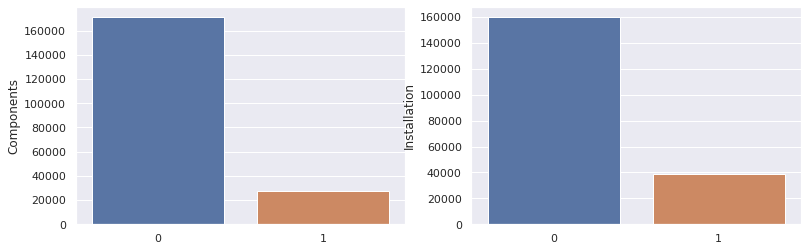

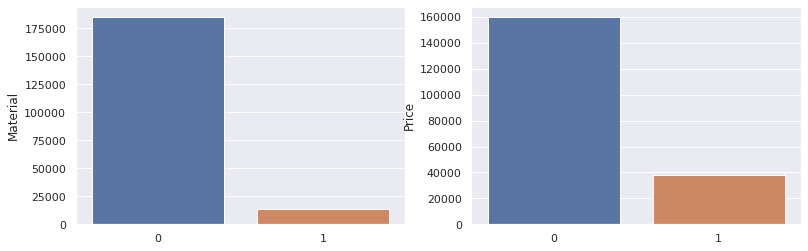

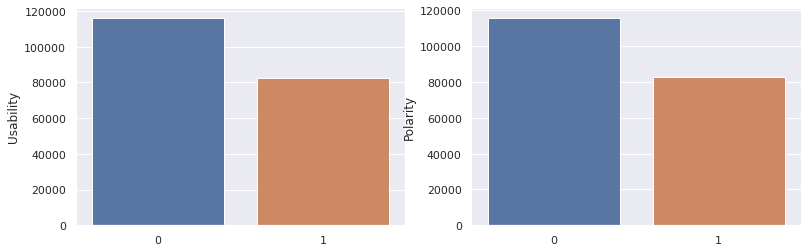

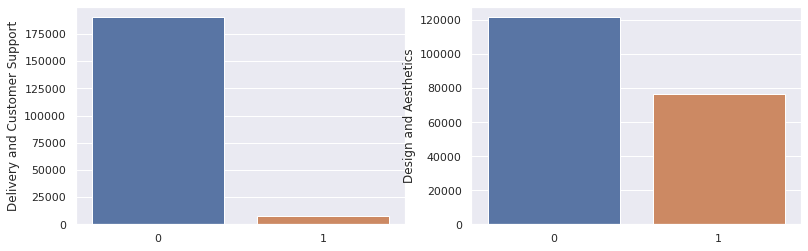

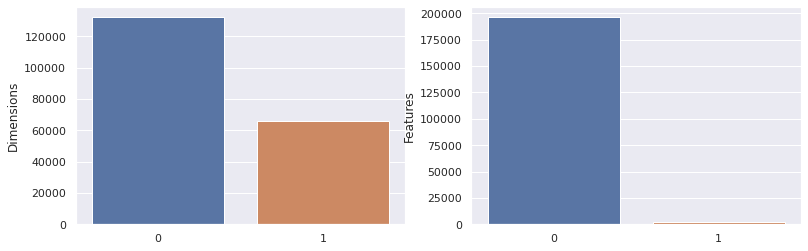

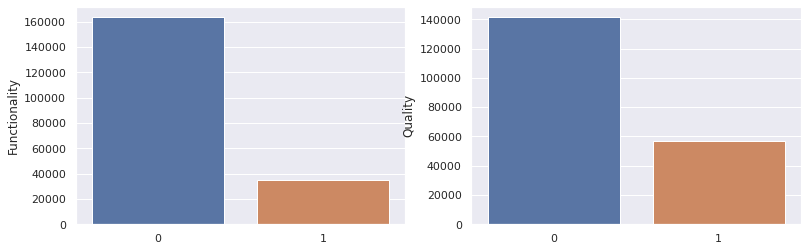

In [10]:
plot_column_class_distribution(['Components', 'Installation'])
plot_column_class_distribution(['Material', 'Price'])
plot_column_class_distribution(['Usability', 'Polarity'])
plot_column_class_distribution(['Delivery and Customer Support', 'Design and Aesthetics'])
plot_column_class_distribution(['Dimensions', 'Features'])
plot_column_class_distribution(['Functionality', 'Quality'])

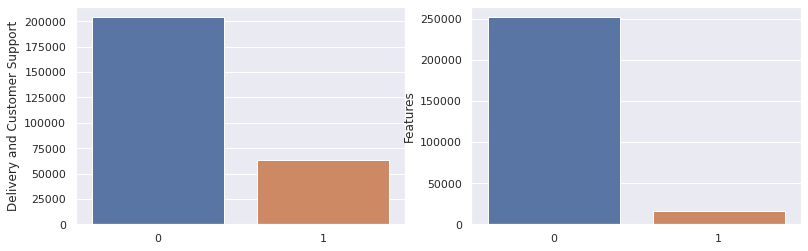

In [14]:
plot_column_class_distribution(['Delivery and Customer Support', 'Features'])

In [ ]:
def drop_duplicates():
  data.drop_duplicates(inplace=True)

### Expanding Contractions

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

### General Preprocessing

1. Convert to lowercase
2. Remove Punctuation
3. Remove Stopwords
4. Stemming/Lemmatization
5. Remove Numbers

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

stop_words = nltk.download("stopwords")
lemmatizer = WordNetLemmatizer()

def general_preprocessing(text):
  text = text.str.lower()
  text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
  text = text.apply(lambda x: re.sub('W*dw*','',x))
  text = " ".join([word for word in str(text).split() if word not in stop_words])
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.DataFrame()
df['text'] = "Hello, I am so ha55y!. I walked around on a sunny day"
a = general_preprocessing(df['text'])
a

In [37]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [38]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [40]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive